# k-Nearest Neighbors
### Author: Beixian Gu

## Table of content
- Introduction
- Algorithm Description
- Applications on Datasets

## Introduction

The K-Nearest Neighbors (K-NN) algorithm is a type of instance-based learning method used in machine learning. The K-NN algorithm is a type of lazy learning where the function is only approximated locally, and all computation is deferred until function evaluation. K-NN is often used for pattern recognition and, more specifically, for classification and regression.

## Algorithm Descriotion

In the K-NN algorithm, 'k' is a predetermined constant. The algorithm's functioning varies based on the type of task it's applied to:

* Classification tasks: 
An unlabeled data point is assigned the label most prevalent among the 'k' nearest training samples to that query point.
* Regression tasks: 
The prediction for an unlabeled data point is computed by averaging the values of the 'k' nearest training samples to that query point.

The K-NN method utilizes the 'k' observations from the training set 'T', which are nearest in the input space to 'x', to form $\hat{y}$. Formally, the k-nearest neighbor fit for $\hat{y}$ is defined as:

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)}{x_i}$$

Here, $N_k(x)$ is the neighborhood of 'x', determined by the 'k' closest points $x_i$ in the training sample. The concept of 'closeness' implies a metric, typically the Euclidean distance in this context.

In simpler terms, we identify the 'k' observations with $x_i$ nearest to 'x' in the input space and average their responses.

For classification problems, labels are binary coded. Therefore, $\hat{y}$ is the proportion of the '1' class, representing a majority vote within the neighborhood.
For regression problems, labels are numeric, and $\hat{y}$ is simply the average of the values within the neighborhood.
Euclidean distance, the most commonly used metric to compute the distance between data points, is defined as:


$$ d(\boldsymbol{x}_i, \boldsymbol{x}_j) = \sqrt{\sum_{k=1}^{p} {(\boldsymbol{x}_{ik}-\boldsymbol{x}_{jk})^2}}  $$

where $\boldsymbol{x}_i$, $\boldsymbol{x}_j$ are two $1 \times p$ data point vectors.

It's important to note that the neighbors are sourced from a known dataset, effectively serving as the training data for the algorithm. However, no explicit training step is required, as the learning is instance-based.

## Applications on Datasets

* Classification: *Fish* data set
* Regression: *house price* data set

### Fish
Load the data: This part reads the fish dataset from a CSV file into a pandas DataFrame.
Prepare the data: This part separates the DataFrame into features (X) and target (y) variables, splits them into 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# load the dataset
df = pd.read_csv('fish.csv')

# print the first few rows of the dataset to check if it loaded correctly
print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Training and testing sets, and scales the features.

In [9]:
# define the feature matrix X and the target y
X = df.drop('Species', axis=1)  # features (all columns except 'Species')
y = df['Species']  # target (the 'Species' column)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the classifier: This part creates a K-NN classifier, sets the number of neighbors to 3 (this value can be adjusted as needed), and trains it using the training data.
Make predictions: This part uses the trained classifier to make predictions on the testing data.

In [10]:
# train the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # use 3 nearest neighbors
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)


Evaluate the model: This part prints a confusion matrix and a classification report, which provides several metrics that can be used to evaluate the classifier's performance.
So, the entire code is intended for a classification task. If you want to use it for regression, you would need to make a few adjustments, such as using KNeighborsRegressor instead of KNeighborsClassifier and evaluating the model differently.

In [11]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[ 7  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 12  0  1  1  0]
 [ 0  0  0  1  0  0  0]
 [ 1  0  4  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

       Bream       0.88      1.00      0.93         7
      Parkki       1.00      1.00      1.00         1
       Perch       0.71      0.86      0.77        14
        Pike       1.00      1.00      1.00         1
       Roach       0.50      0.17      0.25         6
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.75        32
   macro avg       0.68      0.72      0.68        32
weighted avg       0.70      0.75      0.70        32

              precision    recall  f1-score   support

       Bream       0.88      1.00      0.93         7
      Parkki       1.00      1.00      1.00         1
       Perch       0.71      0.86      0.77        14
        Pike     

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


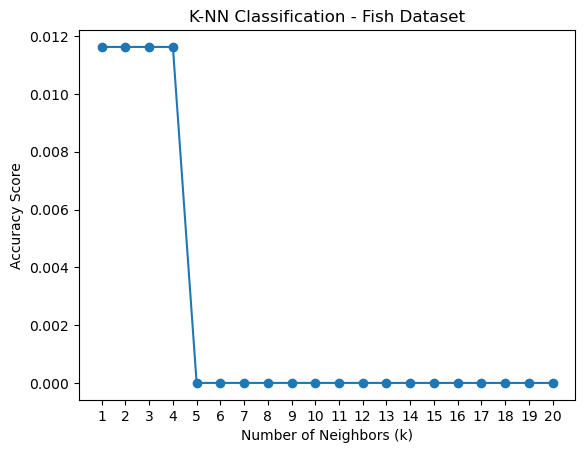

In [28]:
import matplotlib.pyplot as plt

# try different values of k
k_values = range(1, 21)

# record the accuracy scores for each k
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# plot the accuracy scores against k
plt.plot(k_values, accuracy_scores, '-o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('K-NN Classification - Fish Dataset')
plt.xticks(k_values)
plt.show()


### House price

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# load the dataset
df = pd.read_csv('house price.csv')

# print the first few rows of the dataset to check if it loaded correctly
print(df.head())


   beds  baths  size  lot_size  zip_code    price
0     3    3.0  2850   4200.00     98119  1175000
1     4    5.0  3040   5002.00     98106  1057500
2     3    1.0  1290   6048.00     98125   799000
3     3    2.0  2360      0.28     98188   565000
4     3    3.5  1942   1603.00     98107  1187000


In [24]:
df = df.dropna()
from sklearn.impute import SimpleImputer

# use mean imputation
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# define the feature matrix X and the target y
X = df.drop('price', axis=1)  # features (all columns except 'price')
y = df['price']  # target (the 'price' column)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# train the K-NN regressor
knn = KNeighborsRegressor(n_neighbors=3)  # use 3 nearest neighbors
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)


In [26]:
# calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 378654.2082555647


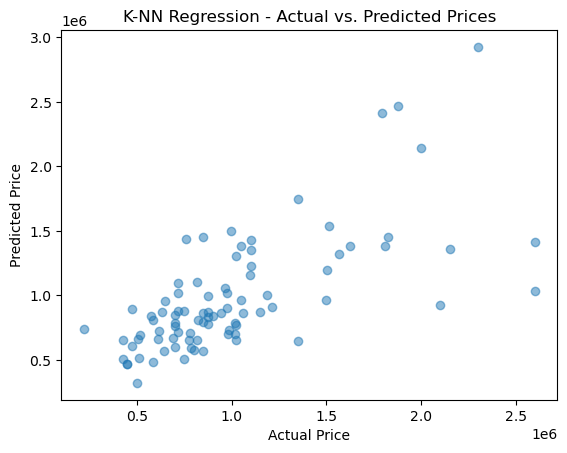

In [27]:
import matplotlib.pyplot as plt

# create a scatter plot of predicted vs. actual prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('K-NN Regression - Actual vs. Predicted Prices')
plt.show()
